In [42]:
# importing essential libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [43]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [44]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [45]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [46]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [47]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [48]:
model.score(X_test, y_test)

0.452606602161738

Text(0, 0.5, 'Predictions')

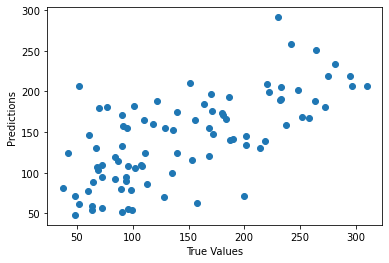

In [49]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [50]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


# Feature Scaling

In [51]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [52]:
y = data['Value']

In [53]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [54]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

### MinMaxScaler

In [32]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)
print(X_train)
print(norm.transform(X_train))

            Age   Overall  Potential  Jersey Number
0      0.448276  0.416667   0.382979       0.010204
1      0.275862  0.625000   0.659574       0.091837
2      0.206897  0.458333   0.553191       0.132653
3      0.275862  0.416667   0.489362       0.010204
4      0.413793  0.291667   0.255319       0.142857
...         ...       ...        ...            ...
14320  0.482759  0.625000   0.595745       0.306122
14321  0.655172  0.479167   0.446809       0.081633
14322  0.517241  0.375000   0.340426       0.255102
14323  0.103448  0.229167   0.510638       0.275510
14324  0.344828  0.354167   0.340426       0.336735

[14325 rows x 4 columns]
[[0.44827586 0.41666667 0.38297872 0.01020408]
 [0.27586207 0.625      0.65957447 0.09183673]
 [0.20689655 0.45833333 0.55319149 0.13265306]
 ...
 [0.51724138 0.375      0.34042553 0.25510204]
 [0.10344828 0.22916667 0.5106383  0.2755102 ]
 [0.34482759 0.35416667 0.34042553 0.33673469]]


In [16]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [17]:
X_train

,Age,Overall,Potential,Jersey Number
0,0.448276,0.416667,0.382979,0.010204
1,0.275862,0.625000,0.659574,0.091837
2,0.206897,0.458333,0.553191,0.132653
3,0.275862,0.416667,0.489362,0.010204
4,0.413793,0.291667,0.255319,0.142857
...,...,...,...,...
14320,0.482759,0.625000,0.595745,0.306122
14321,0.655172,0.479167,0.446809,0.081633
14322,0.517241,0.375000,0.340426,0.255102
14323,0.103448,0.229167,0.510638,0.275510


In [18]:
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

In [19]:
X_test

,Age,Overall,Potential,Jersey Number
0,0.517241,0.729167,0.702128,0.204082
1,0.172414,0.354167,0.446809,0.071429
2,0.241379,0.375000,0.531915,0.132653
3,0.655172,0.479167,0.446809,0.204082
4,0.275862,0.520833,0.617021,0.142857
...,...,...,...,...
3577,0.275862,0.458333,0.510638,0.214286
3578,0.103448,0.312500,0.531915,0.173469
3579,0.137931,0.375000,0.617021,0.204082
3580,0.206897,0.354167,0.468085,0.020408


#### Implement your own MinMaxScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [100]:
class MyMinMaxScaler:
    
    def __init__(self):
        # TODO
        pass

    def fit(self, X):
        # TODO
        self.X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        return self.X_std
        
    def transform(self, s_min = 0, s_max = 1):
        # TODO
        self.X_transformed = slef.X_std * (s_max - s_min) + s_min
        return self.X_transformed

In [110]:
# TODO
minMaxScaler = MyMinMaxScaler().fit(X_train)
X_train = pd.DataFrame(columns = X_train.columns, data = minMaxScaler.transform(X_train, 0, 1))
print(X_train)
X_test = pd.DataFrame(columns = X_train.columns, data = minMaxScaler.transform(X_test, 0, 1))
print(X_test)

            Age   Overall  Potential  Jersey Number
0      0.344828  0.500000   0.488889       0.234694
1      0.413793  0.437500   0.377778       0.081633
2      0.448276  0.458333   0.400000       0.224490
3      0.137931  0.437500   0.688889       0.255102
4      0.413793  0.416667   0.377778       0.112245
...         ...       ...        ...            ...
14320  0.172414  0.437500   0.533333       0.979592
14321  0.275862  0.520833   0.555556       0.255102
14322  0.241379  0.479167   0.577778       0.265306
14323  0.344828  0.500000   0.488889       0.193878
14324  0.103448  0.208333   0.355556       0.153061

[14325 rows x 4 columns]
            Age   Overall  Potential  Jersey Number
0      0.344828  0.500000   0.488889       0.234694
1      0.413793  0.437500   0.377778       0.081633
2      0.448276  0.458333   0.400000       0.224490
3      0.137931  0.437500   0.688889       0.255102
4      0.413793  0.416667   0.377778       0.112245
...         ...       ...        ...  

### Standard Scaler

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [113]:
X_train  = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

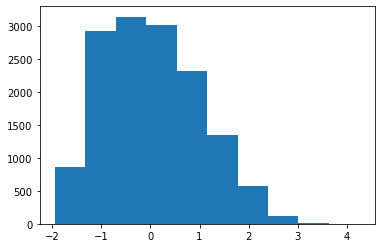

In [114]:
plt.hist(X_train.Age)
plt.show()

In [115]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.192114,0.546103,0.110982,0.274522
1,0.619813,0.112636,-0.705316,-0.668469
2,0.833663,0.257125,-0.542056,0.211656
3,-1.090984,0.112636,1.580320,0.400254
4,0.619813,-0.031853,-0.705316,-0.479871
...,...,...,...,...
14320,-0.877135,0.112636,0.437502,4.863746
14321,-0.235586,0.690592,0.600762,0.400254
14322,-0.449435,0.401614,0.764021,0.463120
14323,0.192114,0.546103,0.110982,0.023057


#### Implement your own StandardScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [116]:
class MyStandardScaler:
    
    def __init__(self):
        # TODO
        pass
        
    def fit(self, X):
        # TODO
        self.mean = np.sum(X) / len(X)
        self.X_std = np.sqrt(abs(X - self.mean) ** 2)
        return self
        
    def transform(self, X):
        # TODO
        X_transformed = X - self.mean / self.X_std
        return X_transformed

In [117]:
# TODO
std_scaler = MyStandardScaler().fit(X_train)
print(std_scaler.transform(X_train))
std_scaler = MyStandardScaler().fit(X_test)
print(std_scaler.transform(X_test))

            Age   Overall  Potential  Jersey Number
0      0.192114  0.546103   0.110982       0.274522
1      0.619813  0.112636  -0.705316      -0.668469
2      0.833663  0.257125  -0.542056       0.211656
3     -1.090984  0.112636   1.580320       0.400254
4      0.619813 -0.031853  -0.705316      -0.479871
...         ...       ...        ...            ...
14320 -0.877135  0.112636   0.437502       4.863746
14321 -0.235586  0.690592   0.600762       0.400254
14322 -0.449435  0.401614   0.764021       0.463120
14323  0.192114  0.546103   0.110982       0.023057
14324 -1.304834 -1.476743  -0.868576      -0.228407

[14325 rows x 4 columns]
            Age    Overall  Potential  Jersey Number
0     -9.786573  -4.849969 -30.874019      -4.032355
1     -2.726480 -25.501248  -4.557217      -1.670726
2     -1.886460 -10.904369  -6.021345      -5.309960
3     -1.646130 -25.501248  -1.513660      -2.671535
4     -2.726480 -91.305309  -4.557217      -2.328823
...         ...        ...      

# tasks

###### try applying this scalers to any dataset and check the regression results

In [ ]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [ ]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [ ]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

In [ ]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [ ]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [ ]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

In [ ]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

In [ ]:
data = pd.read_csv('regression.csv') 
y = data.Value
data = data.drop(['Name', 'Nationality', 'Club', 
                  'Wage', 'Position', 'Contract Valid Until', 
                  'Height', 'Weight', 'Value'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [ ]:
norm = StandardScaler().fit(X_train)

In [ ]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))